In [14]:
import pandas as pd


In [15]:
sp_2020_df = pd.read_csv("APAC_SP_2020.csv", sep=",")
sp_2020_df

,PA_SEXO,PA_VALAPR,PA_FLER,PA_CNPJCPF,PA_CNSMED,PA_CIDCAS,PA_TPFIN,PA_DOCORIG,PA_INE,NU_VPA_TOT,PA_MVM,PA_FLQT,PA_AUTORIZ,PA_TRANSF,PA_TIPPRE,IDADEMIN,PA_VALPRO,PA_QTDAPR,PA_VL_INC,PA_CODUNI,PA_QTDPRO,PA_FLIDADE,PA_CODOCO,PA_MOTSAI,PA_CNPJ_CC,PA_OBITO,PA_INCOUT,PA_CATEND,NU_PA_TOT,PA_CIDSEC,PA_DIF_VAL,PA_RACACOR,PA_ETNIA,PA_UFMUN,PA_MNDIF,PA_NAT_JUR,PA_CBOCOD,PA_MUNPCN,PA_INCURG,PA_CONDIC,PA_CNPJMNT,PA_UFDIF,PA_TPUPS,PA_PERMAN,PA_GESTAO,PA_MN_IND,PA_IDADE,PA_VL_CL,PA_CIDPRI,PA_SRV_C,IDADEMAX,PA_INDICA,PA_ALTA,PA_ENCERR,PA_CMP,PA_VL_CF,PA_PROC_ID,PA_NIVCPL,PA_REGCT,PA_SUBFIN
0,M,11.0,0,46319000000150,700503722246458,0,6,I,NaN,0.0,202010,K,0000000000000,0,0,0,11.0,1,0.0,9242295,1,1,1,0,0,0,0,2,11.0,0,0.0,1,NaN,351880,0,1244,225125,351880,0,PG,46319000000150,0,73,0,351880,M,38,0.0,L20,NaN,130,5,0,0,202010,0.0,301060096,2,0,0
1,M,11.0,0,46319000000150,980016286905443,0,6,I,NaN,0.0,202010,K,0000000000000,0,0,0,11.0,1,0.0,9400109,1,1,1,0,0,0,0,2,11.0,0,0.0,1,NaN,351880,0,1244,225125,351880,0,PG,46319000000150,0,73,0,351880,M,41,0.0,L209,NaN,130,5,0,0,202010,0.0,301060096,2,0,0
2,F,11.0,0,46634044000174,705000886405659,0,6,I,NaN,0.0,202010,K,0000000000000,0,0,0,11.0,1,0.0,5883229,1,1,1,0,0,0,0,2,11.0,0,0.0,1,NaN,355220,1,1244,225125,355700,0,PG,46634044000174,0,73,0,355220,M,55,0.0,L20,NaN,130,5,0,0,202010,0.0,301060096,2,0,0
3,M,11.0,0,46319000000150,133685298100004,0,6,I,NaN,0.0,202010,K,0000000000000,0,0,0,11.0,1,0.0,2090589,1,1,1,0,0,0,0,2,11.0,0,0.0,1,NaN,351880,0,1244,225125,351880,0,PG,46319000000150,0,73,0,351880,M,14,0.0,L209,NaN,130,5,0,0,202010,0.0,301060096,2,0,0
4,F,11.0,0,47970769000104,706001301397346,0,6,I,NaN,0.0,202010,K,2660000000000,0,0,0,11.0,1,0.0,7746180,1,1,1,0,0,0,0,1,11.0,0,0.0,1,NaN,351620,0,1244,225125,351620,0,PG,47970769000104,0,73,0,351620,M,30,0.0,L209,NaN,130,5,0,0,202010,0.0,301060096,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,F,11.0,0,44733608000109,700502925398553,0,6,I,NaN,0.0,202003,K,0000000000000,0,0,0,11.0,1,0.0,2063603,1,1,1,0,0,0,0,2,11.0,0,0.0,99,NaN,352050,0,1244,225125,352050,0,PG,44733608000109,0,73,0,352050,M,20,0.0,L209,NaN,130,5,0,0,202003,0.0,301060096,2,7114,0
3249,M,48.0,0,60499365000215,207272775150002,0,6,I,NaN,0.0,202003,K,0000000000000,0,0,0,48.0,2,0.0,2784602,2,1,1,0,0,0,0,1,24.0,0,0.0,99,NaN,352050,0,3069,225148,352050,0,PG,60499365000134,0,5,0,352050,M,39,0.0,L208,120001.0,130,5,0,0,202003,0.0,203020030,2,0,0
3250,F,11.0,0,46634044000174,700501524815659,0,6,I,NaN,0.0,202003,K,0000000000000,0,0,0,11.0,1,0.0,5883229,1,1,1,0,0,0,0,2,11.0,0,0.0,1,NaN,355220,0,1244,225124,355220,0,PG,46634044000174,0,73,0,355220,M,2,0.0,L209,NaN,130,5,0,0,202003,0.0,301060096,2,0,0
3251,M,11.0,0,46634044000174,709506612015970,0,6,I,NaN,0.0,202003,K,0000000000000,0,0,0,11.0,1,0.0,5883229,1,1,1,0,0,0,0,2,11.0,0,0.0,1,NaN,355220,0,1244,225124,355220,0,PG,46634044000174,0,73,0,355220,M,0,0.0,L20,NaN,130,5,0,0,202003,0.0,301060096,2,0,0


In [47]:
#Validando que existem apenas cid L20 no dataframe
sp_2020_df['PA_CIDPRI'].unique()

array(['L20', 'L209', 'L208', 'L200'], dtype=object)

In [16]:
len(sp_2020_df)

3253

In [17]:
for i in range(len(sp_2020_df)):
  val = str(sp_2020_df['PA_MVM'][i])
  split_dates = [val[i:i+4] for i in range(0, len(val), 4)]
  sp_2020_df.loc[i, 'YEAR'] = split_dates[0]
  sp_2020_df.loc[i, 'MONTH'] = split_dates[1]
sp_2020_df

,PA_SEXO,PA_VALAPR,PA_FLER,PA_CNPJCPF,PA_CNSMED,PA_CIDCAS,PA_TPFIN,PA_DOCORIG,PA_INE,NU_VPA_TOT,PA_MVM,PA_FLQT,PA_AUTORIZ,PA_TRANSF,PA_TIPPRE,IDADEMIN,PA_VALPRO,PA_QTDAPR,PA_VL_INC,PA_CODUNI,PA_QTDPRO,PA_FLIDADE,PA_CODOCO,PA_MOTSAI,PA_CNPJ_CC,PA_OBITO,PA_INCOUT,PA_CATEND,NU_PA_TOT,PA_CIDSEC,PA_DIF_VAL,PA_RACACOR,PA_ETNIA,PA_UFMUN,PA_MNDIF,PA_NAT_JUR,PA_CBOCOD,PA_MUNPCN,PA_INCURG,PA_CONDIC,PA_CNPJMNT,PA_UFDIF,PA_TPUPS,PA_PERMAN,PA_GESTAO,PA_MN_IND,PA_IDADE,PA_VL_CL,PA_CIDPRI,PA_SRV_C,IDADEMAX,PA_INDICA,PA_ALTA,PA_ENCERR,PA_CMP,PA_VL_CF,PA_PROC_ID,PA_NIVCPL,PA_REGCT,PA_SUBFIN,YEAR,MONTH
0,M,11.0,0,46319000000150,700503722246458,0,6,I,NaN,0.0,202010,K,0000000000000,0,0,0,11.0,1,0.0,9242295,1,1,1,0,0,0,0,2,11.0,0,0.0,1,NaN,351880,0,1244,225125,351880,0,PG,46319000000150,0,73,0,351880,M,38,0.0,L20,NaN,130,5,0,0,202010,0.0,301060096,2,0,0,2020,10
1,M,11.0,0,46319000000150,980016286905443,0,6,I,NaN,0.0,202010,K,0000000000000,0,0,0,11.0,1,0.0,9400109,1,1,1,0,0,0,0,2,11.0,0,0.0,1,NaN,351880,0,1244,225125,351880,0,PG,46319000000150,0,73,0,351880,M,41,0.0,L209,NaN,130,5,0,0,202010,0.0,301060096,2,0,0,2020,10
2,F,11.0,0,46634044000174,705000886405659,0,6,I,NaN,0.0,202010,K,0000000000000,0,0,0,11.0,1,0.0,5883229,1,1,1,0,0,0,0,2,11.0,0,0.0,1,NaN,355220,1,1244,225125,355700,0,PG,46634044000174,0,73,0,355220,M,55,0.0,L20,NaN,130,5,0,0,202010,0.0,301060096,2,0,0,2020,10
3,M,11.0,0,46319000000150,133685298100004,0,6,I,NaN,0.0,202010,K,0000000000000,0,0,0,11.0,1,0.0,2090589,1,1,1,0,0,0,0,2,11.0,0,0.0,1,NaN,351880,0,1244,225125,351880,0,PG,46319000000150,0,73,0,351880,M,14,0.0,L209,NaN,130,5,0,0,202010,0.0,301060096,2,0,0,2020,10
4,F,11.0,0,47970769000104,706001301397346,0,6,I,NaN,0.0,202010,K,2660000000000,0,0,0,11.0,1,0.0,7746180,1,1,1,0,0,0,0,1,11.0,0,0.0,1,NaN,351620,0,1244,225125,351620,0,PG,47970769000104,0,73,0,351620,M,30,0.0,L209,NaN,130,5,0,0,202010,0.0,301060096,2,0,0,2020,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,F,11.0,0,44733608000109,700502925398553,0,6,I,NaN,0.0,202003,K,0000000000000,0,0,0,11.0,1,0.0,2063603,1,1,1,0,0,0,0,2,11.0,0,0.0,99,NaN,352050,0,1244,225125,352050,0,PG,44733608000109,0,73,0,352050,M,20,0.0,L209,NaN,130,5,0,0,202003,0.0,301060096,2,7114,0,2020,03
3249,M,48.0,0,60499365000215,207272775150002,0,6,I,NaN,0.0,202003,K,0000000000000,0,0,0,48.0,2,0.0,2784602,2,1,1,0,0,0,0,1,24.0,0,0.0,99,NaN,352050,0,3069,225148,352050,0,PG,60499365000134,0,5,0,352050,M,39,0.0,L208,120001.0,130,5,0,0,202003,0.0,203020030,2,0,0,2020,03
3250,F,11.0,0,46634044000174,700501524815659,0,6,I,NaN,0.0,202003,K,0000000000000,0,0,0,11.0,1,0.0,5883229,1,1,1,0,0,0,0,2,11.0,0,0.0,1,NaN,355220,0,1244,225124,355220,0,PG,46634044000174,0,73,0,355220,M,2,0.0,L209,NaN,130,5,0,0,202003,0.0,301060096,2,0,0,2020,03
3251,M,11.0,0,46634044000174,709506612015970,0,6,I,NaN,0.0,202003,K,0000000000000,0,0,0,11.0,1,0.0,5883229,1,1,1,0,0,0,0,2,11.0,0,0.0,1,NaN,355220,0,1244,225124,355220,0,PG,46634044000174,0,73,0,355220,M,0,0.0,L20,NaN,130,5,0,0,202003,0.0,301060096,2,0,0,2020,03


In [23]:
#PA_VALAPR - Valor Aprovado do procedimento
sp_2020_valapr = sp_2020_df.groupby(['MONTH'])['PA_VALAPR'].agg('sum')
sp_2020_valapr = pd.DataFrame(sp_2020_valapr)
sp_2020_valapr

,PA_VALAPR
MONTH,
01,4467.57
02,3060.18
03,2896.23
04,1967.17
05,2487.91
06,1688.81
07,1958.48
08,3034.77
09,2941.54


In [26]:
#Valor total Aprovado ao longo do ano de 2020 para o estado do SP
sum_valAprovado_2020 = sp_2020_valapr['PA_VALAPR'].sum()
sum_valAprovado_2020

34937.060000000005

In [25]:
#PA_VALPRO NUMERIC - Valor Produzido (APRESENTADO)
sp_2020_valpr = sp_2020_df.groupby(['MONTH'])['PA_VALPRO'].agg('sum')
sp_2020_valpr = pd.DataFrame(sp_2020_valpr)
sp_2020_valpr

,PA_VALPRO
MONTH,
01,4467.57
02,3060.18
03,2896.23
04,1991.37
05,2487.91
06,1688.81
07,1958.48
08,3034.77
09,2941.54


In [34]:
#Valor total Produzido ao longo do ano de 2020 para o estado do SP
sum_valProduzido_2020 = sp_2020_valpr['PA_VALPRO'].sum()
sum_valProduzido_2020

34961.26

In [35]:
comparacao = pd.merge(sp_2020_valapr, sp_2020_valpr, how = 'left', on = 'MONTH')
comparacao

,PA_VALAPR,PA_VALPRO
MONTH,,
01,4467.57,4467.57
02,3060.18,3060.18
03,2896.23,2896.23
04,1967.17,1991.37
05,2487.91,2487.91
06,1688.81,1688.81
07,1958.48,1958.48
08,3034.77,3034.77
09,2941.54,2941.54


In [38]:
comparacao.columns

Index(['PA_VALAPR', 'PA_VALPRO'], dtype='object')

In [41]:
#avaliando a comparação entre os valores produzidos e os aprovados por meses em SP 2020
comparacao["diff"] = comparacao['PA_VALPRO'] - comparacao['PA_VALAPR']
comparacao


#Apenas no mês de abril não foi aprovado todo o valor produzido, faltando apenas 24,20 reais para cobrir todo o procedimento

,PA_VALAPR,PA_VALPRO,diff
MONTH,,,
01,4467.57,4467.57,0.0
02,3060.18,3060.18,0.0
03,2896.23,2896.23,0.0
04,1967.17,1991.37,24.2
05,2487.91,2487.91,0.0
06,1688.81,1688.81,0.0
07,1958.48,1958.48,0.0
08,3034.77,3034.77,0.0
09,2941.54,2941.54,0.0


Tabela de caráter de atendimento do SUS (fonte: https://bvsms.saude.gov.br/bvs/saudelegis/sas/2007/prt0719_28_12_2007.html)

OBS: 99 = "INFORMAÇÃO INEXISTENTE  (BPA-C)"


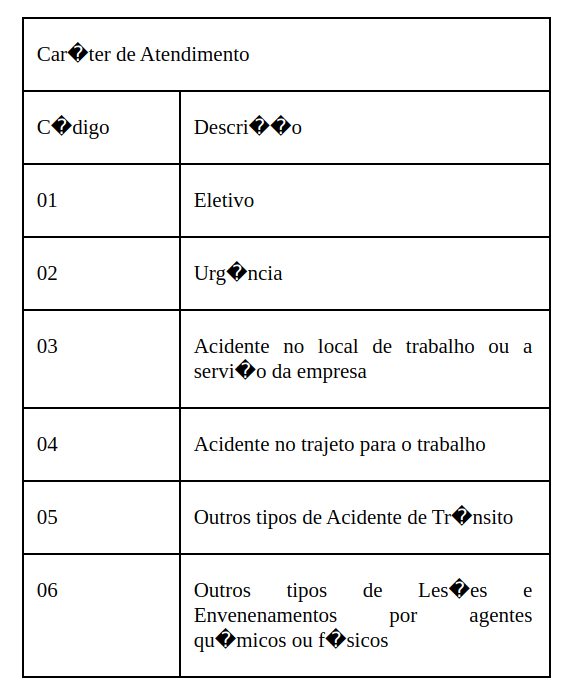

In [42]:
#groupby entre month e PA_CATEND (Caráter de Atendimento), somando os valores de PA_VALAPR e PA_VALPRO

sp_2020_pa_catend = sp_2020_df.groupby(['MONTH', 'PA_CATEND'])['PA_VALAPR'].agg('sum')
sp_2020_pa_catend = pd.DataFrame(sp_2020_pa_catend)
sp_2020_pa_catend

PA_VALAPR
MONTH PA_CATEND           
01    1            1967.81
      2            2499.76
02    1            1361.44
      2            1698.74
03    1            1338.16
      2            1558.07
04    1             978.01
      2             989.16
05    1            1463.33
      2            1024.58
06    1             963.38
      2             660.63
      6              64.80
07    1            1219.47
      2             739.01
08    1            1444.20
      2            1590.57
09    1            1357.54
      2            1584.00
10    1            1636.90
      2            1361.62
11    1            1388.99
      2            2012.27
12    1            1661.97
      2            2372.65

In [44]:
#groupby PA_CATEND (Caráter de Atendimento), somando os valores de PA_VALAPR e PA_VALPRO, para o ano todo de 2020 no estado de SP

sp_2020_pa_catend_2 = sp_2020_df.groupby(['PA_CATEND'])['PA_VALAPR'].agg('sum')
sp_2020_pa_catend_2 = pd.DataFrame(sp_2020_pa_catend_2)
sp_2020_pa_catend_2

,PA_VALAPR
PA_CATEND,
1,16781.20
2,18091.06
6,64.80


In [45]:
#groupby PA_CATEND (Caráter de Atendimento), somando os valores de PA_VALAPR e PA_VALPRO, para o ano todo de 2020 no estado de SP

sp_2020_pa_catend_3 = sp_2020_df.groupby(['PA_CATEND'])['PA_VALPRO'].agg('sum')
sp_2020_pa_catend_3 = pd.DataFrame(sp_2020_pa_catend_3)
sp_2020_pa_catend_3

,PA_VALPRO
PA_CATEND,
1,16781.20
2,18115.26
6,64.80


In [46]:
sp_2020_pa_catend_total = pd.merge(sp_2020_pa_catend_2, sp_2020_pa_catend_3, how = 'left', on = 'PA_CATEND')
sp_2020_pa_catend_total

#Nem todo o dinheiro produzido na urgência foi aprovado, mesmo valor de R$ 24,20 identificado anteriormente

,PA_VALAPR,PA_VALPRO
PA_CATEND,,
1,16781.20,16781.20
2,18091.06,18115.26
6,64.80,64.80
